# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World


## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1]:
import numpy as np
import random

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [2]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'south'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [3]:
def simple_environment1(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [4]:
simple_environment1(simple_randomized_agent, max_steps = 20)

step 0 - action: suck
step 1 - action: south
step 2 - action: north
step 3 - action: north
step 4 - action: north
step 5 - action: suck
step 6 - action: north
step 7 - action: south
step 8 - action: suck
step 9 - action: suck
step 10 - action: east
step 11 - action: north
step 12 - action: east
step 13 - action: north
step 14 - action: suck
step 15 - action: east
step 16 - action: north
step 17 - action: south
step 18 - action: east
step 19 - action: south


5

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. Use the same environmnt for all your agent implementations in the tasks below.

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [5]:
# max_tile defines how large the room is, ex: max_tile=5, then the room is 5x5
def find_next_path(max_tile):
    # providing feedback to the agent based on the action taken
    # reset the state of agent for update (check future to see if necessary)
    # update to true when against a wall
    bumpers = {"north": False, "south": False, "west": False, "east": False}
    if pos[1] <= 0: bumpers["north"] = True
    if pos[1] >= max_tile: bumpers["south"] = True
    if pos[0] <= 0: bumpers["west"] = True
    if pos[0] >= max_tile: bumpers["east"] = True

    return bumpers


def simple_environment(agent, max_steps, verbose=True, room_size=0):
    # global values used in simple environment
    global pos, bumpers

    max_tile = room_size - 1
    # setup and print basic environment
    startX = random.randint(0, max_tile)
    startY = random.randint(0, max_tile)

    pos = [startX, startY]
    p = 0  # possibility of dirty block
    room = np.random.choice([0, 1], (room_size, room_size), [p, 1-p])  # comment to switch to obstacle 0:dirty 1:norm 

    # uncomment below to switch to obstacle 0:dirty 1:obstacle 2:norm
    # room = np.random.choice([0, 1, 2], (room_size, room_size), [p, p_obs, 1-p-p_obs])  
    
    num_cleaned = 0
    # setup bumper before calling agent for the first time
    bumpers = find_next_path(max_tile)
    # print("curr bumpers value: " ,bumpers)

    # get the amount of dirty floors in room
    count_dirty = 0
    for x in room:
        for y in x:
            if y==0: count_dirty += 1
    

    # loop as many times as steps allowed
    for i in range(max_steps):
        if(count_dirty == num_cleaned):
            break
        # update tile status
        
        if room[pos[1]][pos[0]] == 0:
            tile_dirty = True
        else:
            tile_dirty = False

        # run agent
        action = agent(bumpers, tile_dirty)
        # print(action)
        if (verbose): print("step", i, "- action:", action)

        # performing agent's action on the map
        if action == "suck":
            num_cleaned = num_cleaned + 1
            room[pos[1]][pos[0]] = 1 #change to norm from dirty

        else:
            if action == "north":
                pos[1] = pos[1] - 1
            if action == "south":
                pos[1] = pos[1] + 1
            if action == "east":
                pos[0] = pos[0] + 1
            if action == "west":
                pos[0] = pos[0] - 1

        bumpers = find_next_path(max_tile)
        # print("curr bumpers value: " ,bumpers)

    return float(num_cleaned/count_dirty)

## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [6]:
def reflex_agent(bumpers_in, is_dirty):
    if is_dirty:
        return "suck"
    else:
        # pick a random direction that the agent could move to
        return np.random.choice([act for act in actions if (act != "suck" and bumpers_in[act] == False)])

##### With every state when bumper updates, this simple reflex agent would either sucks when the floor is empty, or randomly picks a direction that it could head towards.

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb))

## Each state:
1. the environment calls the agent after the bumpers information have been updated based on its "current location" and "floor_dirty" information in the room
2.  the model based reflex agent "plans" the next move based on the information updated by the environment, the logic:
* if dirty, "suck"
* else: "the u-turn pattern"
    * if the agent has reached the corner once
        * if the agent is not heading towards north:
            * if the agent has not reached south boarder, go south
            * else, move east and reverse turn direction to north
        * else/if the agent is heading towards towards south
            * if the agent has not reached north boarder, go north
            * else, move east and reverse turn direction to south

    * else:
        * seek the left top [0,0] corner by moving towards west and north
        * once corner has been reached, the agent does the "u-turn" pattern in the room


In [7]:
class model_based_reflex_agent: #U-turn agent
    def __init__(self, cornered_x=False, cornered_y=False):

        self.is_cornered_x = cornered_x
        self.is_cornered_y = cornered_y
        self.turn = False #making U-turn
        self.turn_direct = False # true=turn north, false=south


    def act(self, bumpers_in, isDirty):
        

        if isDirty:
            return "suck"
        else:
            # corner the agent to [0,0]
            if self.is_cornered_x and self.is_cornered_y:  # when cornering is done
                if not self.turn_direct:
                    if not bumpers_in["south"]:
                        return "south" # when heading south but not reaching bottom
                    else:
                        self.turn_direct = not self.turn_direct # change direction
                        #print("U-turning to NORTH")
                        return "east" # when heading south, reached bottom, then u-turn
                else:
                    if not bumpers_in["north"]:
                        return "north"  # when heading north but not reaching top
                    else:
                        self.turn_direct = not self.turn_direct # change direction
                        #print("U-turning to SOUTH")
                        return "east"  # when heading north, reached bottom, then u-turn
            else:  # when the agent haven't been cornered

                if bumpers_in["west"]:
                    self.is_cornered_x = True
                else:
                    return "west"
                if bumpers_in["north"]:
                    self.is_cornered_y = True
                else:
                    return "north"

uturn_agent = model_based_reflex_agent()

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb))

In [8]:


def simulation_study():
    # running random_agent on 5x5, 10x10, 100x100, 100 times each, take average
    
    # num of cleaned is the % of tiles cleaned each run
    sum_of_random_clean5 = 0
    for x in range(100):
        num_cleaned = simple_environment(reflex_agent, 50, False, 5)
        sum_of_random_clean5 += num_cleaned
    avg_of_random_clean5 = sum_of_random_clean5 / 100
    print("average of random clean 5x5: ", avg_of_random_clean5)

    sum_of_random_clean10 = 0
    # num of cleaned is the % of tiles cleaned each run
    for x in range(100):
        num_cleaned = simple_environment(reflex_agent, 200, False, 10)
        sum_of_random_clean10 += num_cleaned
    avg_of_random_clean10 = sum_of_random_clean10 / 100
    print("average of random clean 10x10: ", avg_of_random_clean10)

    sum_of_random_clean100 = 0
    # num of cleaned is the % of tiles cleaned each run
    for x in range(100):
        num_cleaned = simple_environment(reflex_agent, 20000, False, 100)
        sum_of_random_clean100 += num_cleaned
    avg_of_random_clean100 = sum_of_random_clean100 / 100
    print("average of random clean 100x100: ", avg_of_random_clean100)


    # running simple_reflex_agent on 5x5, 10x10, 100x100, 100 times each, take average
    sum_of_reflex_clean5=0
    # num of cleaned is the % of tiles cleaned each run

    for x in range (100):
        num_cleaned = simple_environment(reflex_agent, 50, False, 5)
        sum_of_reflex_clean5+=num_cleaned
    avg_of_reflex_clean5=sum_of_reflex_clean5/100
    print("average of reflex clean 5x5: ",avg_of_reflex_clean5)

    sum_of_reflex_clean10=0
    # num of cleaned is the % of tiles cleaned each run
    for x in range (100):
        num_cleaned = simple_environment(reflex_agent, 200, False, 10)
        sum_of_reflex_clean10+=num_cleaned
    avg_of_reflex_clean10=sum_of_reflex_clean10/100
    print("average of reflex clean 10x10: ", avg_of_reflex_clean10)

    sum_of_reflex_clean100 = 0
    # num of cleaned is the % of tiles cleaned each run
    for x in range(100):
        num_cleaned = simple_environment(reflex_agent, 20000, False, 100)
        sum_of_reflex_clean100 += num_cleaned
    avg_of_reflex_clean100 = sum_of_reflex_clean100 / 100
    print("average of reflex clean 100x100: ", avg_of_reflex_clean100)

    
    sum_of_model_clean5 = 0
    # num of cleaned is the % of tiles cleaned each run
    for x in range(100):
        uturn_agent = model_based_reflex_agent(False, False)
        num_cleaned = simple_environment(uturn_agent.act, 50, False, 5)
        sum_of_model_clean5 += num_cleaned

    avg_of_model_clean5 = sum_of_model_clean5 / 100
    print("average of model based clean 5x5: ", avg_of_model_clean5)

    uturn_agent = model_based_reflex_agent()
    sum_of_model_clean10 = 0
    # num of cleaned is the % of tiles cleaned each run
    for x in range(100):
        uturn_agent = model_based_reflex_agent()
        num_cleaned = simple_environment(uturn_agent.act, 200, False, 10)
        sum_of_model_clean10 += num_cleaned

    avg_of_model_clean10 = sum_of_model_clean10 / 100
    print("average of model based clean 10x10: ", avg_of_model_clean10)


    sum_of_model_clean100 = 0
    # num of cleaned is the % of tiles cleaned each run
    for x in range(100):
        uturn_agent = model_based_reflex_agent()
        num_cleaned = simple_environment(uturn_agent.act, 20000, False, 100)
        sum_of_model_clean100 += num_cleaned

    avg_of_model_clean100 = sum_of_model_clean100 / 100
    print("average of model based clean 100x100: ", avg_of_model_clean100)


# run simulation study
simulation_study()

average of model based clean 5x5:  1.0
average of model based clean 10x10:  1.0
average of model based clean 100x100:  1.0


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     |0.640 |0.646 |1.0 |
| 10x10   |0.537 |0.526 |1.0 |
| 100x100 |0.370 |0.371 |1.0 |

Add charts to compare the performance of the different agents.


#### 3 datasets: random vs simple reflex vs model based agents
#### This graph shows the performance of our three agents when facing rooms with the scales of 5x5, 10x10, and 100x100. With 100 simulation runs on each size, we have taken an:
#### Average of the percentage of dirty floors cleaned by the vacuum agent. This is how it was calculated:

- a = dirty floors cleaned

- b = total dirty tiles

# $\frac {\sum_{}^{} \frac{a}{b}} {100}$

#### For the sake of efficiency, each simulation run has a limit amount of moves that the agent could make, scaling with the room size:
- 5x5: $5^{2}$ *2
- 10x10: $10^{2}$ *2
- 100x100: $100^{2}$ *2

5x5 performance: 


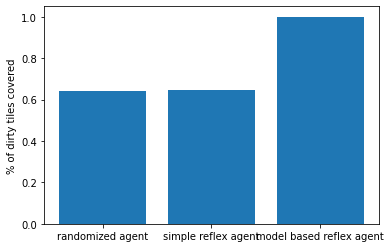

10x10 performance: 


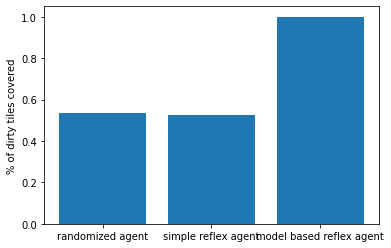

100x100 performance: 


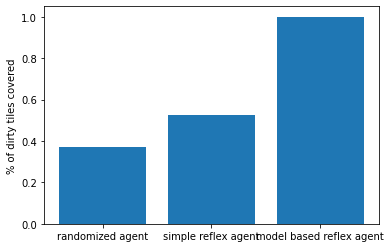

In [9]:
# Your graphs and discussion of the results goes here
import matplotlib.pyplot as plt
import seaborn as sns 

agents=["randomized agent", "simple reflex agent", "model based reflex agent"]
data1=[0.640, 0.646, 1.0]
data2=[0.537, 0.526, 1.0]
data3=[0.370, 0.526, 1.0]

# print title
print(f"5x5 performance: ")
# plot bar graph
plt.bar(agents, data1)
plt.ylabel("% of dirty tiles covered")
plt.show()

# print title
print(f"10x10 performance: ")
# plot bar graph
plt.bar(agents, data2)
plt.ylabel("% of dirty tiles covered")
plt.show()

# print title
print(f"100x100 performance: ")
# plot bar graph
plt.bar(agents, data3)
plt.ylabel("% of dirty tiles covered")
plt.show()


#### In comparison, while forfeiting the flexibility that random agent and simple reflex agents, model based reflex agent consistantly has a high performance in a room that doesn't have obstacles, as it completes the cleaning task every run.
#### Simple reflex agent, based on the randomized agent, has a better performance since it eliminates the potential "wrong steps" (steps that runs the agent into a wall or randomly sucks). However, the performance still isn't as good as the model based reflex agent.
#### Therefore, in a scenario that a room doesn't have have irregular shape or obstacles, the model based reflex agent functions the best.


## Task 5: Robustness of the agent implementations [10 Points] 

Describe how your agent implementations will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

1. if it is put into a rectangular room with unknown size, 
    * the model based agent would still complete its task because it would do the same thing of: moving to the northeast corner, then traverse through the room with U-turns. Random agent and simple reflex agent would still be performing not much different from a square room with known size.
####

2. if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
  if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

    * In that case, it is likely that simple reflex agent and random agent could out-perform the model-based agent, since the model-based agent would be much less robust facing "suprise" obstacles or walls, when it anticipates the room to be a square or rectangle. 

## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

1. After adding in obstacles, as I was expecting, while all of the runs take a lot of steps to traverse through all the dirty blocks, the model based agent got stuck and struggles to complete the task. Code as follows:

In [10]:
# max_tile defines how large the room is, ex: max_tile=5, then the room is 5x5
def find_next_path(max_tile):
    # providing feedback to the agent based on the action taken
    # reset the state of agent for update (check future to see if necessary)
    # update to true when against a wall
    global bumpers
    bumpers = {"north": False, "south": False, "west": False, "east": False}
    if pos[1] <= 0 or room[pos[1]][pos[0]]==3: bumpers["north"] = True
    if pos[1] >= max_tile or room[pos[1]][pos[0]]==3: bumpers["south"] = True
    if pos[0] <= 0 or room[pos[1]][pos[0]]==3: bumpers["west"] = True
    if pos[0] >= max_tile or room[pos[1]][pos[0]]==3: bumpers["east"] = True


def obstacle_environment(agent, max_steps, verbose=True, room_size=0):
    # global values used in simple environment
    global pos, bumpers, explored, frontier

    max_tile = room_size - 1
    # setup and print basic environment
    startX = random.randint(0, max_tile)
    startY = random.randint(0, max_tile)

    pos = [startX, startY]
    start = (startX, startY)

    explored = [start]
    frontier = [start]
    agentMoves = 0  # counter for the amount of actions unitil all dirty sqaures are cleaned
    p = 0  # possibility of dirty block
    p_obs =0.0 # possibility of obstacle
    # 0:dirty 1:obstacle 2:norm
    room = np.random.choice([0, 1, 2], (room_size, room_size), [p, p_obs, 1-p-p_obs])  
    
    num_cleaned = 0
    # setup bumper before calling agent for the first time
    find_next_path(max_tile)

    # get the amount of dirty floors in room
    count_dirty = 0
    for x in room:
        for y in x:
            if y==0: count_dirty += 1
    

    # loop as many times as steps allowed
    for i in range(max_steps):
        if(count_dirty == num_cleaned):
            break
        # update tile status
        if room[pos[1]][pos[0]] == 0:
            tile_dirty = True
        else:
            tile_dirty = False

        # run agent
        action = agent(bumpers, tile_dirty)
        if (verbose): print("step", i, "- action:", action)

        # performing agent's action on the map
        if action == "suck":
            num_cleaned = num_cleaned + 1
            room[pos[1]][pos[0]] = 1 #change to norm from dirty

        else:
            if action == "north":
                pos[1] = pos[1] - 1
            if action == "south":
                pos[1] = pos[1] + 1
            if action == "east":
                pos[0] = pos[0] + 1
            if action == "west":
                pos[0] = pos[0] - 1

        find_next_path(max_tile)

    return float(num_cleaned/count_dirty)

2. To better traverse through the room around obstacles or other difficult terrains, a goal based agent could be implemented as an agent that would run depth first search until it reaches every available tile on the map.
The pseudocode could look like this:


* stack explored
* stack frontier
* Order = East -> South -> West ->North
* push the starting point into frontier and explored
* repeat until all tiles been traversed or frontier is empty

    
    curr_tile = frontier.pop
    for each direction :
        next_tile = new potential curr_tile
        if next_tile is in explored -> do nothing
        else -> push next_tile into frontier and explored




## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [11]:
# Your ideas/code